# <대한민국 기준금리와 주요 경제지수와의 상관관계 분석>
- 대한민국의 기준금리를 한국은행에서 제공해주는 여러 경제 지수와 분석하여 상호간의 상관관계와 시대별 상관관계를 분석한다.
- **사용하는 경제 지표**
    -GDP, 국제_에너지_원자제가격, 미국_Fed_기준금리, 생산자물가지수, 소비자물가지수, 실업률, 원달러_환율, 은행대출금_연체율, 주택매매가격지수, 통화량, 한국은행_기준금리

## 목차
0. [자주 사용하는 함수 및 파일 정보](Feature_Engineering.ipynb#0-자주-사용하는-함수-및-파일-정보)

1. [각 데이터 분석별 분석 및 전처리](Feature_Engineering.ipynb#1각-데이터-분석별-분석-및-전처리)
    - 분기별 데이터 변환
    - 사용할 데이터 선정
2. [데이터 시각화 및 상관관계분석](Visualization.ipynb#2-1-한국금리-시각화)
    - 전체 데이터 상관관계 분석
    - 2003년 부터의 현재까지의 상관관계
    - 2003년 부터의 20009년까지의 상관관계
    - 2010년 부터의 20020년까지의 상관관계
    - 지난 의 상관관계
    -2003년 부터의 현재까지의 상관관계
    -2003년 부터의 현재까지의 상관관계
3. [결론](Visualization.ipynb#2-4-결론)

## 0. 자주 사용하는 함수 및 파일 정보
- **get_file_list:**: 폴더 안에 있는 파일 리스트로 가져오기
- **read_csv:** 파일 DataFrame으로 불러오기, cvs관련 정보(구조, 정보, Nan값 데이터) 출력
- **sava_csv:** 파일 저장 폴더가 없을 시 생성

In [17]:
import os
import pandas as pd

# 폰트설정
import matplotlib.font_manager as fm
from matplotlib import rc

rc('font', family=fm.FontProperties(fname='C:/Users/HYUK/AppData/Local/Microsoft/Windows/Fonts/NotoSansKR-Thin.ttf').get_name())


dir_path = "../new_csv/"

# 해당 위치에 존재하는 파일들을 리스트로 반환하는 함수
def get_file_list(directory):
    file_list = []

    # 디렉터리 내의 모든 항목에 대해 반복합니다.
    for item in os.listdir(directory):
        # 전체 경로를 생성합니다.
        item_path = os.path.join(directory, item)

        # 파일인 경우에만 리스트에 추가합니다.
        if os.path.isfile(item_path):
            file_list.append(item)

    return file_list

file_path = get_file_list(dir_path)
print(file_path)

def read_csv(dir_path : str, file_path : str, do_print : bool = True):
    df = pd.read_csv(dir_path+file_path)
    if do_print :
        print(file_path,"\n")
        print("데이터 프레임 구조:", df.shape,"\n")
        print(df.head())
        print("\n데이터 정보 :\n")
        print(df.info())
        print("\nNan 값 존재 데이터")
        print(df[df.isnull().any(axis=1)])
    return df

def save_csv(dir_path : str, file_path : str,  df : pd.DataFrame ):
    new_data_path = dir_path+file_path
    
    data_path_os = os.path.dirname(new_data_path)
    if not os.path.exists(data_path_os):
        os.makedirs(data_path_os)

    
    # 데이터 저장
    df.to_csv(dir_path+file_path, index=True)

['new_GDP.csv', 'new_국제_에너지_원자제가격.csv', 'new_미국_Fed_기준금리.csv', 'new_생산자물가지수.csv', 'new_소비자물가지수.csv', 'new_실업률.csv', 'new_원달러_환율.csv', 'new_은행대출금_연체율.csv', 'new_주택매매가격지수.csv', 'new_통화량.csv', 'new_한국은행_기준금리.csv']


## 2.시각화

### 2-1. 한국금리 시각화

In [18]:
df_itr= read_csv(dir_path,"new_한국은행_기준금리.csv",)

new_한국은행_기준금리.csv 

데이터 프레임 구조: (306, 2) 

        변환  기준금리
0  1999/05  4.75
1  1999/06  4.75
2  1999/07  4.75
3  1999/08  4.75
4  1999/09  4.75

데이터 정보 :

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   변환      306 non-null    object 
 1   기준금리    306 non-null    float64
dtypes: float64(1), object(1)
memory usage: 4.9+ KB
None

Nan 값 존재 데이터
Empty DataFrame
Columns: [변환, 기준금리]
Index: []


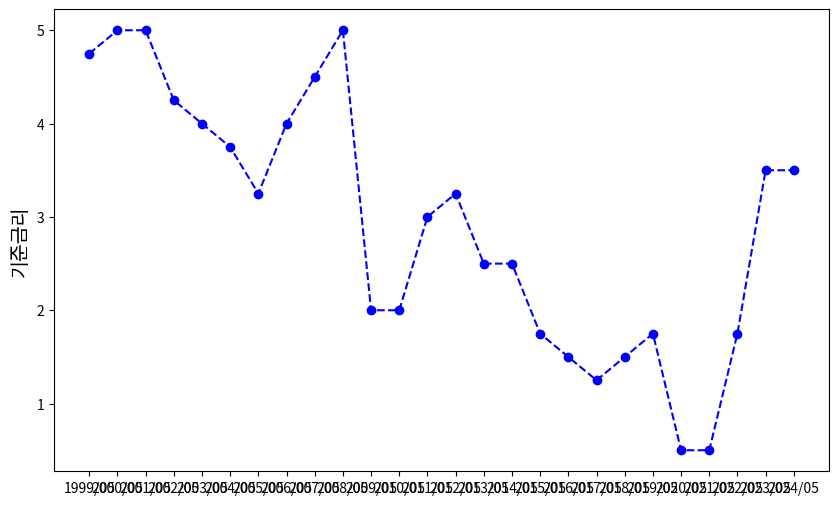

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt
df_sampled = df_itr.iloc[::12]
fig, ax1 = plt.subplots(figsize=(10, 6))
ax1.plot(df_sampled['변환'], df_sampled[df_sampled.columns[1]], color='b', marker='o', linestyle='--', label='Year-over-Year Change')
ax1.set_ylabel('기준금리', fontsize=14)
ax1.tick_params(axis='y')

In [20]:
# import plotly.express as px
# import pandas as pd

# df_sampled = df_itr

# fig = px.scatter(df_sampled, x = df_sampled.columns[0],
#                  y = df_sampled.columns[1],
#                  title = "기준금리 변화" 
#                  size = 'humidity', color = 'dust')

# import plotly.express as px
# import pandas as pd

# df_sampled = df_itr

# # 변환을 위한 애니메이션 컬럼 추가 (애니메이션의 프레임 역할)
# # df_sampled['Frame'] = range(len(df_sampled))  # 각 데이터 포인트에 프레임 번호 부여

# # Plotly Express로 애니메이션 생성
# fig = px.line(
#     df_sampled, 
#     x='변환',  # x축 데이터: 날짜 또는 시간
#     y=df_sampled.columns[1],  # y축 데이터: 두 번째 컬럼 (기준금리)
#     title="기준금리 변화 애니메이션",  # 그래프 제목
#     markers=True,  # 데이터 포인트에 마커 추가
#     animation_frame='변환',  # 애니메이션 프레임 지정
#     labels={'변환': '날짜', df_sampled.columns[1]: '기준금리'},  # 축 레이블
#     line_dash_sequence=['dash'],  # 점선 스타일
#     color_discrete_sequence=['blue']  # 선 색상 지정
# )

# # 레이아웃 추가 설정 (y축, 폰트 크기 등)
# fig.update_layout(
#     yaxis=dict(title='기준금리', titlefont=dict(size=14)),  # y축 제목과 폰트 크기
#     xaxis=dict(title='날짜', titlefont=dict(size=14)),  # x축 제목과 폰트 크기
#     title=dict(font=dict(size=20))  # 그래프 제목 폰트 크기
# )

# # 그래프 출력
# fig.show()

import plotly.graph_objects as go
import pandas as pd

df_sampled = df_itr

frames = []
for i in range(len(df_sampled)-30):
    frame = go.Frame(
        data=[
            go.Scatter(
                x=df_sampled['변환'][i:i+31],
                y=df_sampled['기준금리'][i:i+31],
                name='기준금리 변화',
                line=dict(color='skyblue', dash='dash'),
                marker=dict(size=10),
                yaxis='y1'
            )
        ],
        name=f"Frame {i}"
    )
    frames.append(frame)

fig = go.Figure(
    data = [
        go.Scatter(
            x=df_sampled['변환'],
            y=df_sampled['기준금리'],
            name='기준금리',
            mode='lines+markers',
            line =dict(color='skyblue', dash='dash'),
            marker=dict(size=10),
            yaxis='y1',
        )
    ],
     layout = go.Layout(
            title="기준금리 데이터",
            xaxis=dict(title="날짜"),
            yaxis=dict(
                title="기준금리"
            ),
            legend = dict(x=0.1, y=1.1),
        ),
        frames=frames
)

fig.update_layout(
    updatemenus=[
        dict(
            type="buttons",
            showactive=False,
            buttons=[
                dict(
                    label="Play",
                    method="animate",
                    args=[None, dict(frame=dict(duration=500, redraw=True), fromcurrent=True)]
                ),
                dict(
                    label="Pause",
                    method="animate",
                    args=[[None], dict(frame=dict(duration=0, redraw=False), mode="immediate")]
                ),
            ]
        )
    ]
)

fig.show()


### 2-2. all 데이터 시각화
- 타깃 데이터가 null인 값은 상관관계 분석에 의미가 없기에 탈락

In [21]:
dir_path = "../"
df_org = read_csv(dir_path,"all_data.csv",False)
df_org.dropna(axis=0, subset=[df_org.columns[-1]], inplace=True)
print(f"기준금리가 null인 데이터:\n",df_org[df_org[df_org.columns[-1]].isnull()])
print(df_org.shape)
df_org.set_index(df_org.columns[0],inplace=True)
df_org.index = pd.to_datetime(df_org.index, format="%Y/%m")
print(df_org)

기준금리가 null인 데이터:
 Empty DataFrame
Columns: [변환, GDP_변동률, 원유_변동률, 미국금리, 생산자물가지수(PPI)_증감률률, 소비자물가지수(CPI)_변동률, 실업률, 환율_변동율, 기업대출, 가계대출, 신용카드대출, 주택매매가격지수_변동율, 통화량_변동율, 기준금리]
Index: []
(306, 14)
             GDP_변동률     원유_변동률   미국금리  생산자물가지수(PPI)_증감률률  소비자물가지수(CPI)_변동률  \
변환                                                                            
1999-05-01       NaN   2.133333  4.750                0.4              -0.2   
1999-06-01       NaN   1.833333  5.000               -0.6              -0.6   
1999-07-01       NaN  14.833333  5.000               -0.2              -0.3   
1999-08-01       NaN   7.666667  5.250                0.7               1.0   
1999-09-01       NaN  12.666667  5.250                0.5               0.3   
...              ...        ...    ...                ...               ...   
2024-06-01  0.333333  -0.333333  5.375                0.0              -0.2   
2024-07-01       NaN   1.766667  5.375                0.3               0.3   
2024-08-01       NaN

<Axes: >

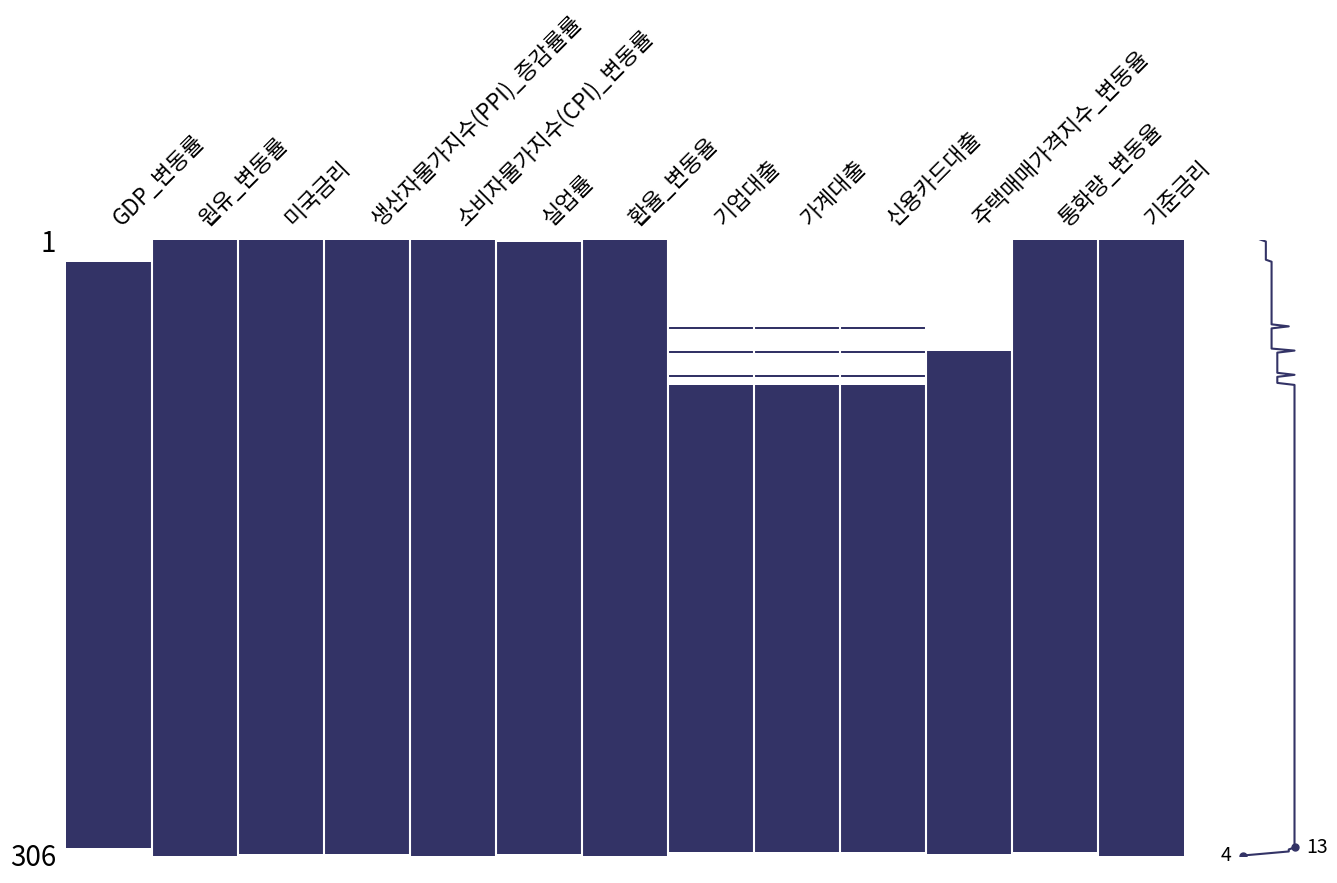

In [22]:
import missingno as msno 
msno.matrix(df=df_org.iloc[:,:], figsize=(16, 8), color=(0.2,0.2,0.4))

<Axes: >

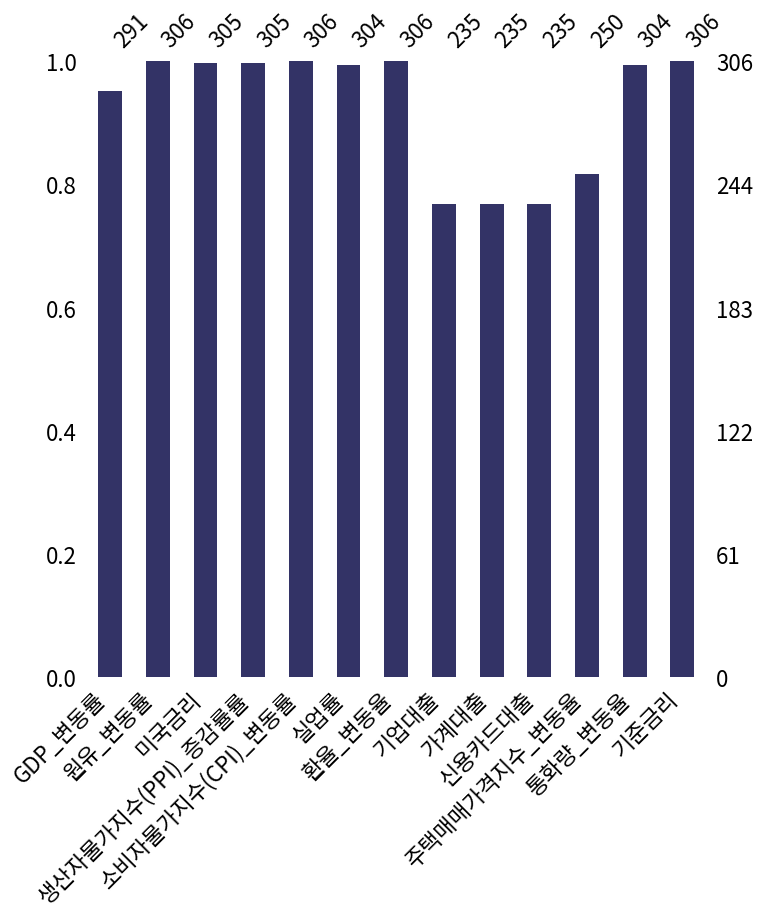

In [23]:
msno.bar(df=df_org.iloc[:,:], figsize=(8, 8), color=(0.2,0.2,0.4))

- 각 특성별 그래프

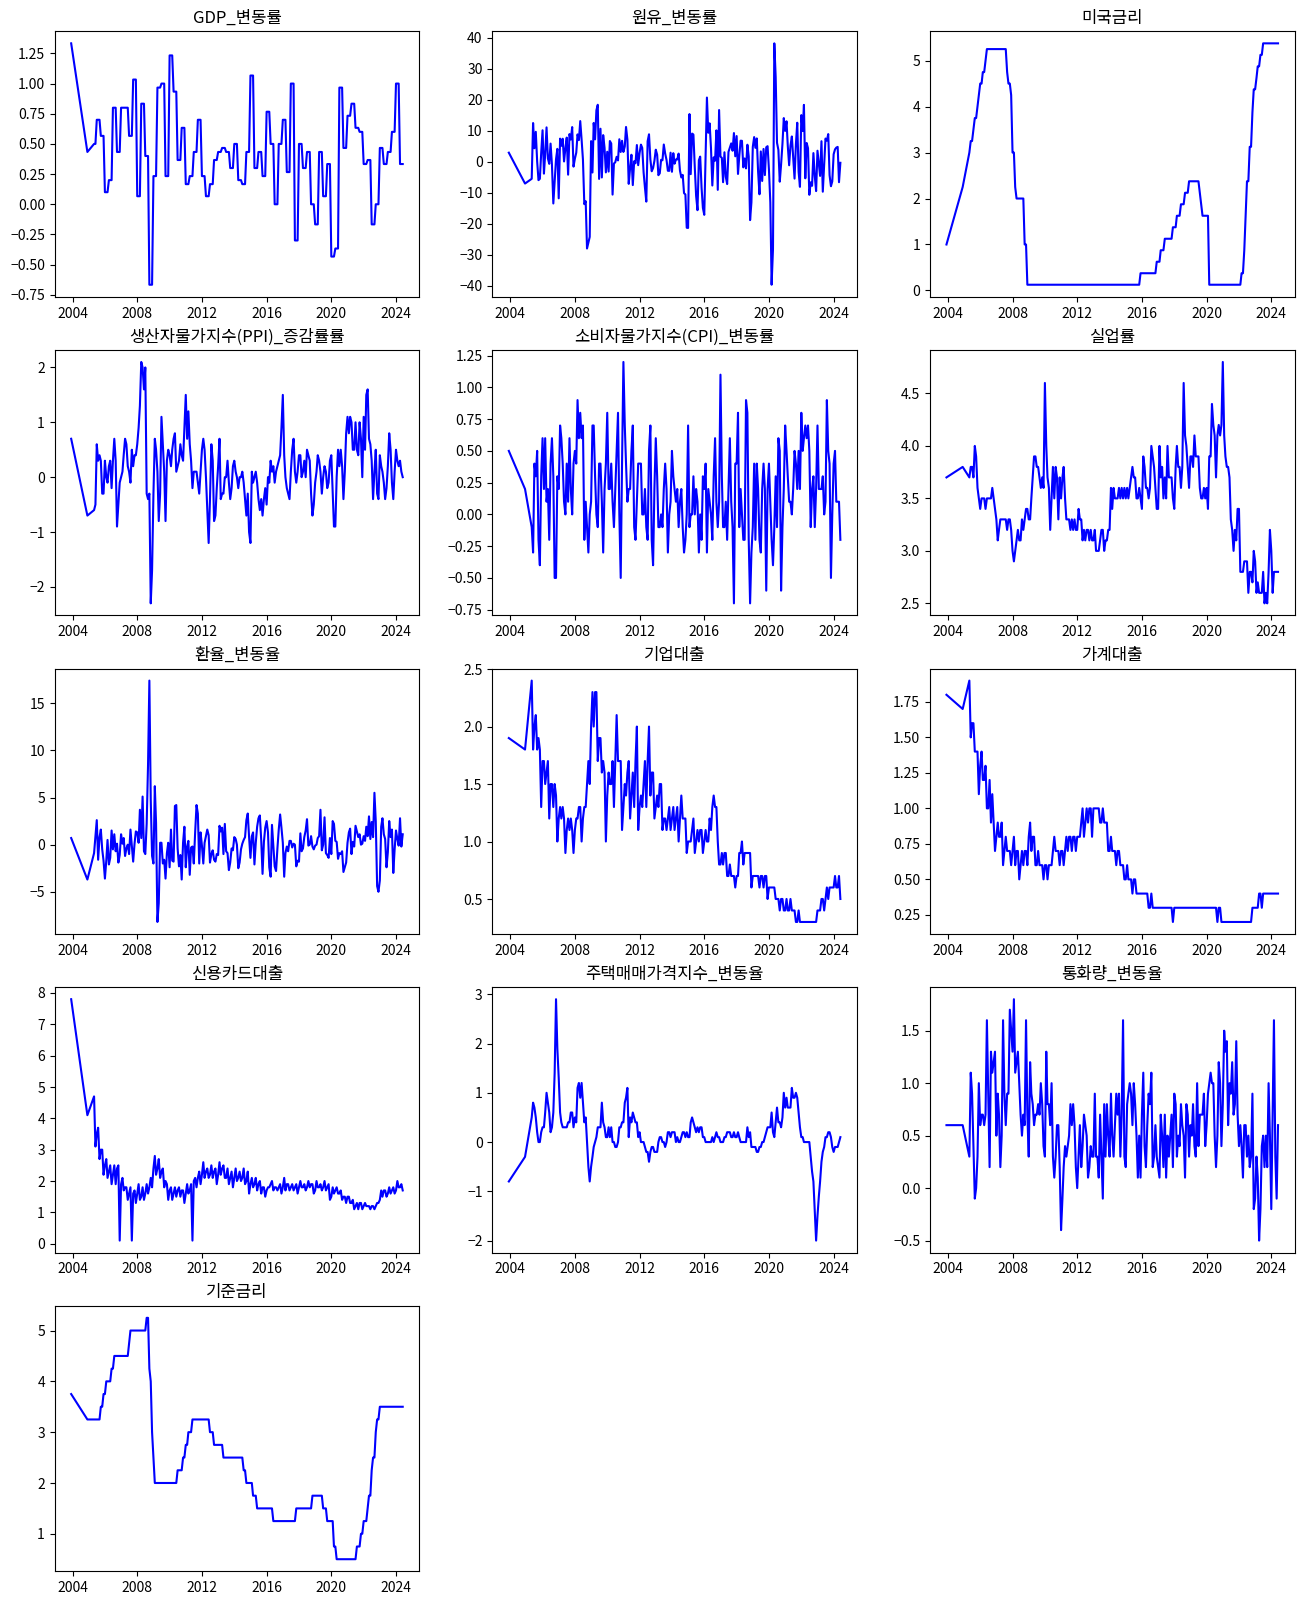

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

df_sampled = df_org.dropna(how='any')
# df_sampled = df_sampled.iloc[::12]

plt.figure(figsize=(16,20))
for i in range(0, len(df_sampled.columns)):
    plt.subplot(5,3,i+1)
    plt.title(df_sampled.columns[i])
    # plt.plot(df_sampled.index, df_sampled[df_sampled.columns[i]], color='b', marker='o', linestyle='--', label=df_sampled.columns[i])
    plt.plot(df_sampled.index, df_sampled[df_sampled.columns[i]], color='b', label=df_sampled.columns[i])


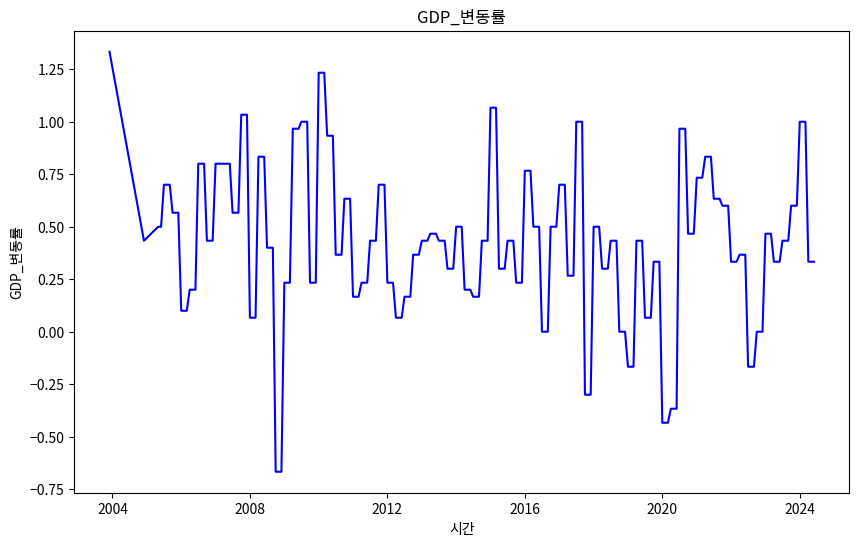

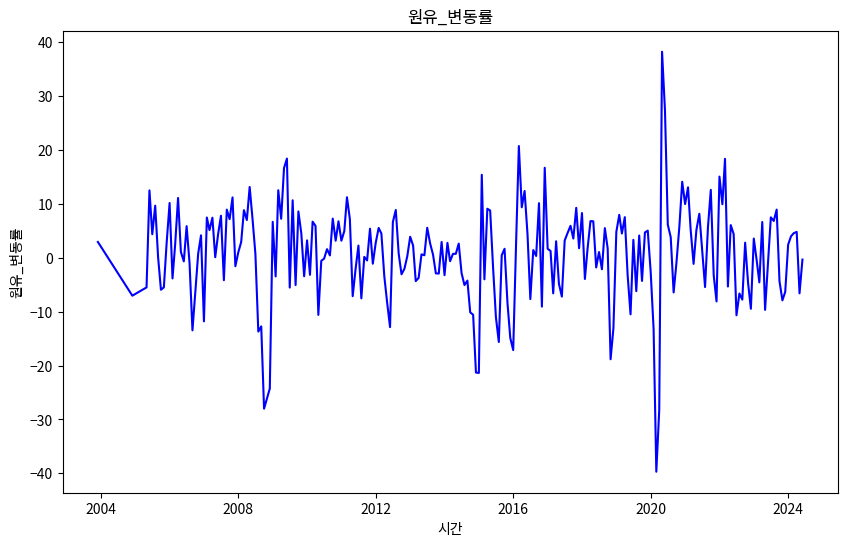

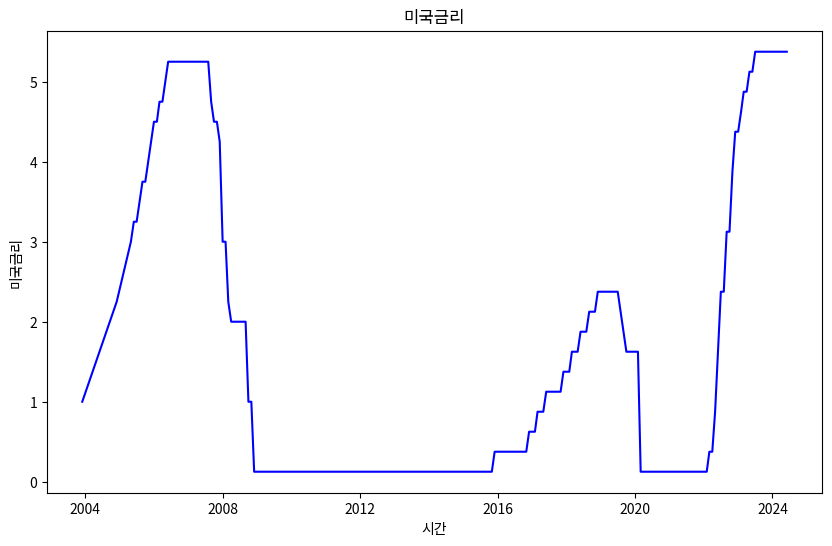

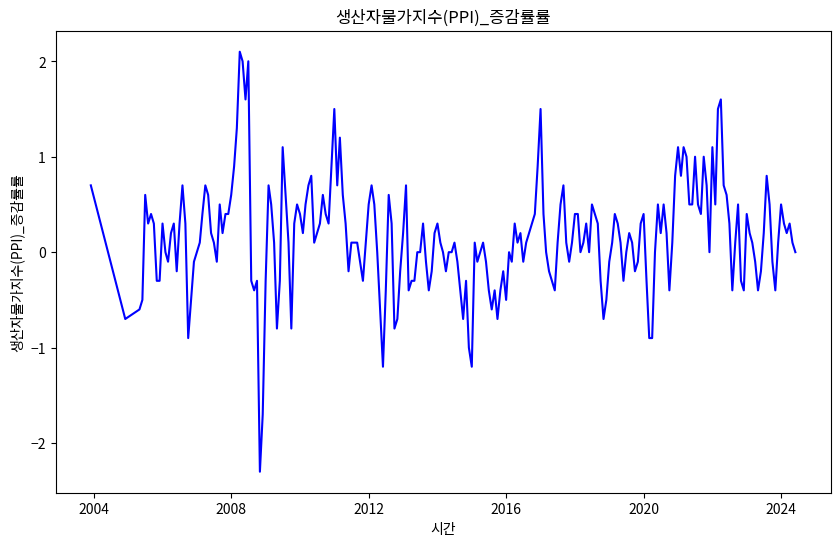

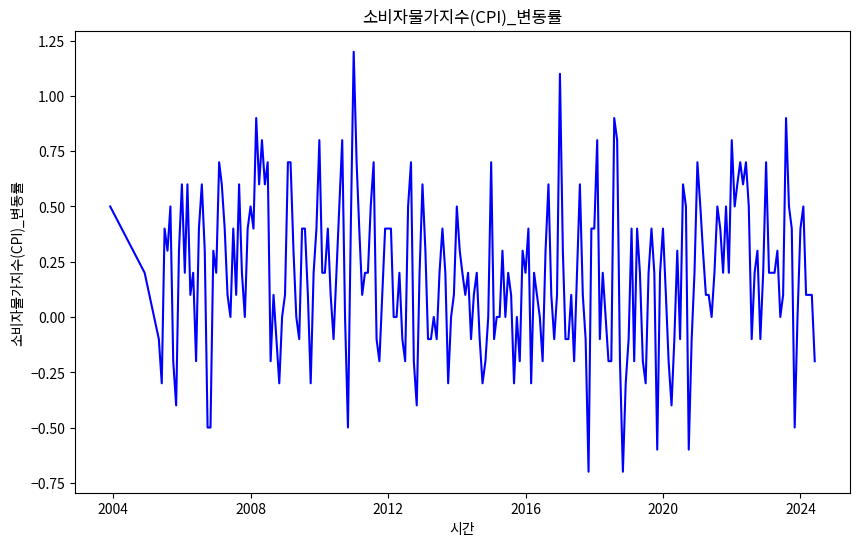

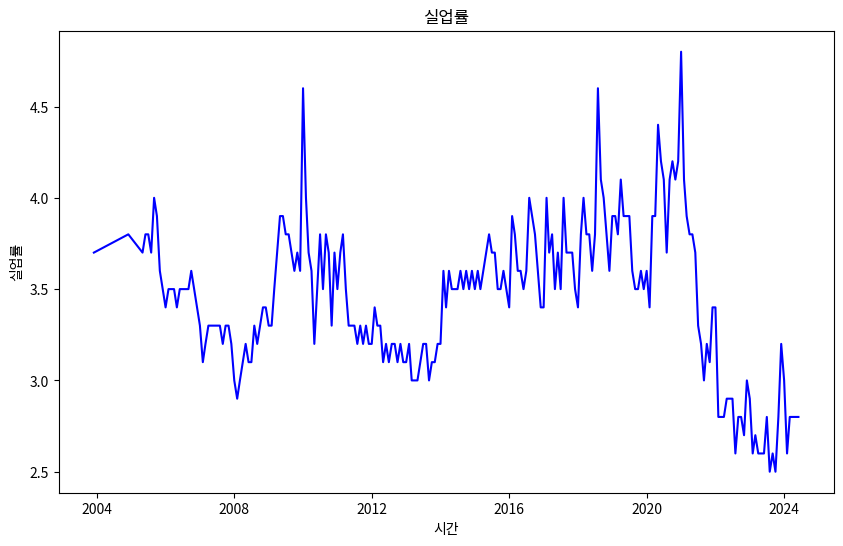

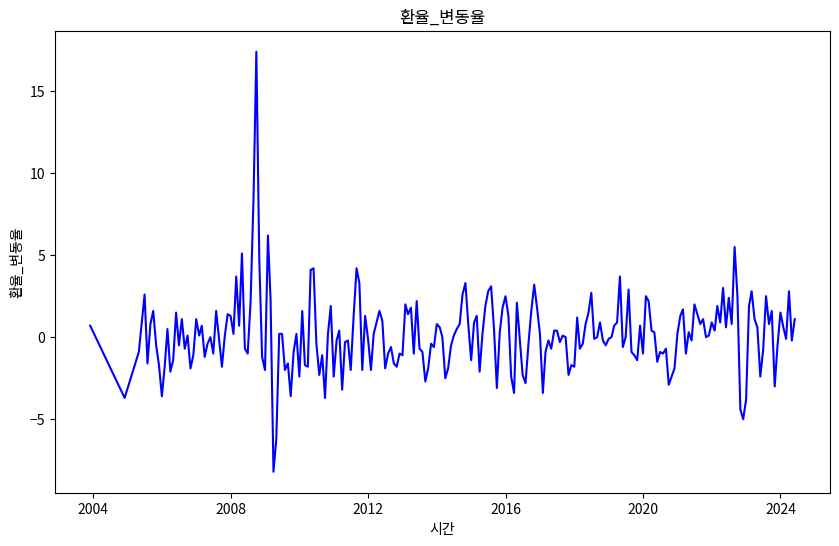

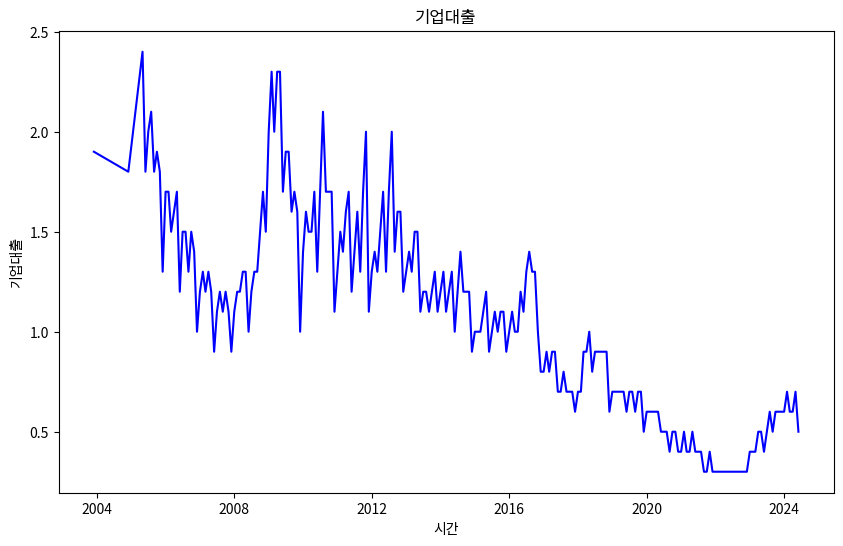

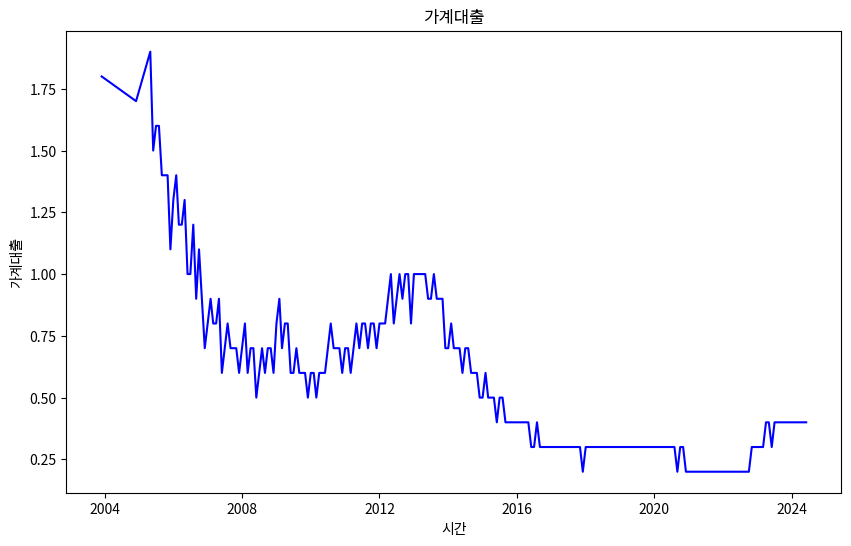

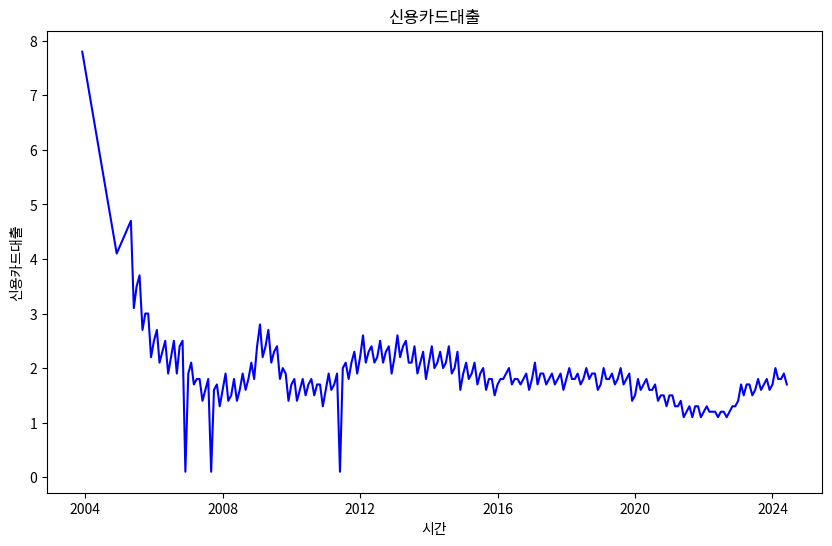

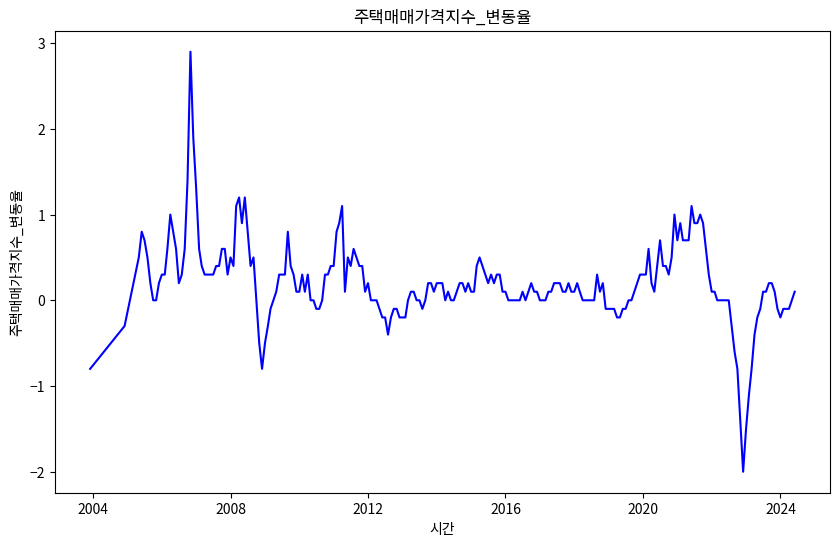

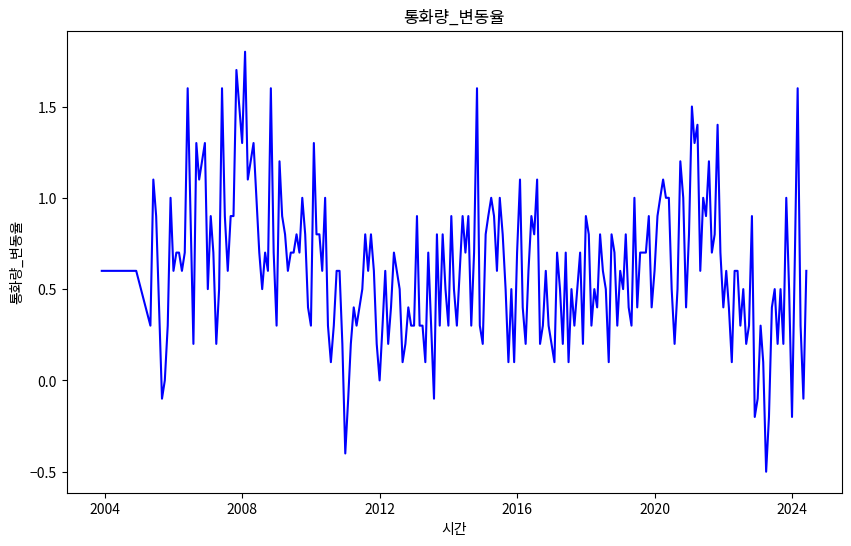

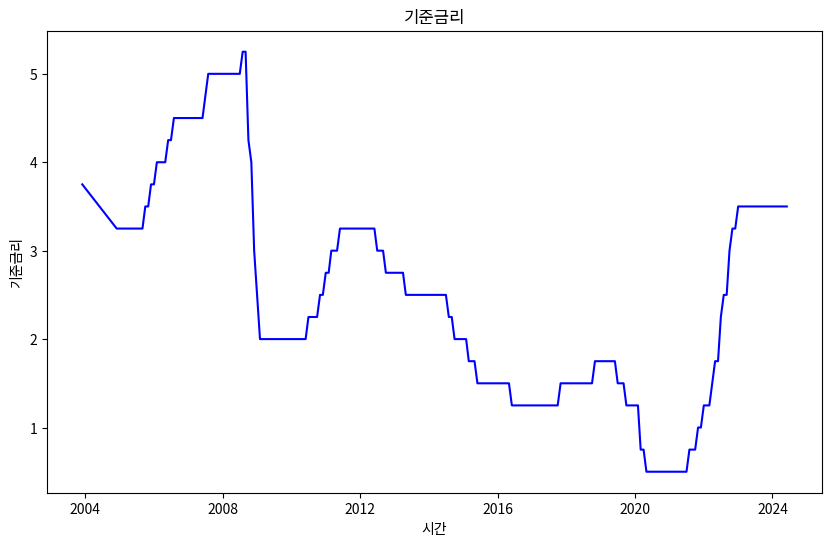

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

df_sampled = df_org.dropna(how='any')
# df_sampled = df_sampled.iloc[::12]

# plt.figure(figsize=(16,20))
for i in range(0, len(df_sampled.columns)):
    plt.figure(figsize=(10,6))
    plt.title(df_sampled.columns[i])
    # plt.plot(df_sampled.index, df_sampled[df_sampled.columns[i]], color='b', marker='o', linestyle='--', label=df_sampled.columns[i])
    plt.plot(df_sampled.index, df_sampled[df_sampled.columns[i]], color='b', label=df_sampled.columns[i])
    plt.xlabel("시간")
    plt.ylabel(df_sampled.columns[i])
    plt.show()



## 2-3)상관계수 시각화

- 전체 데이터

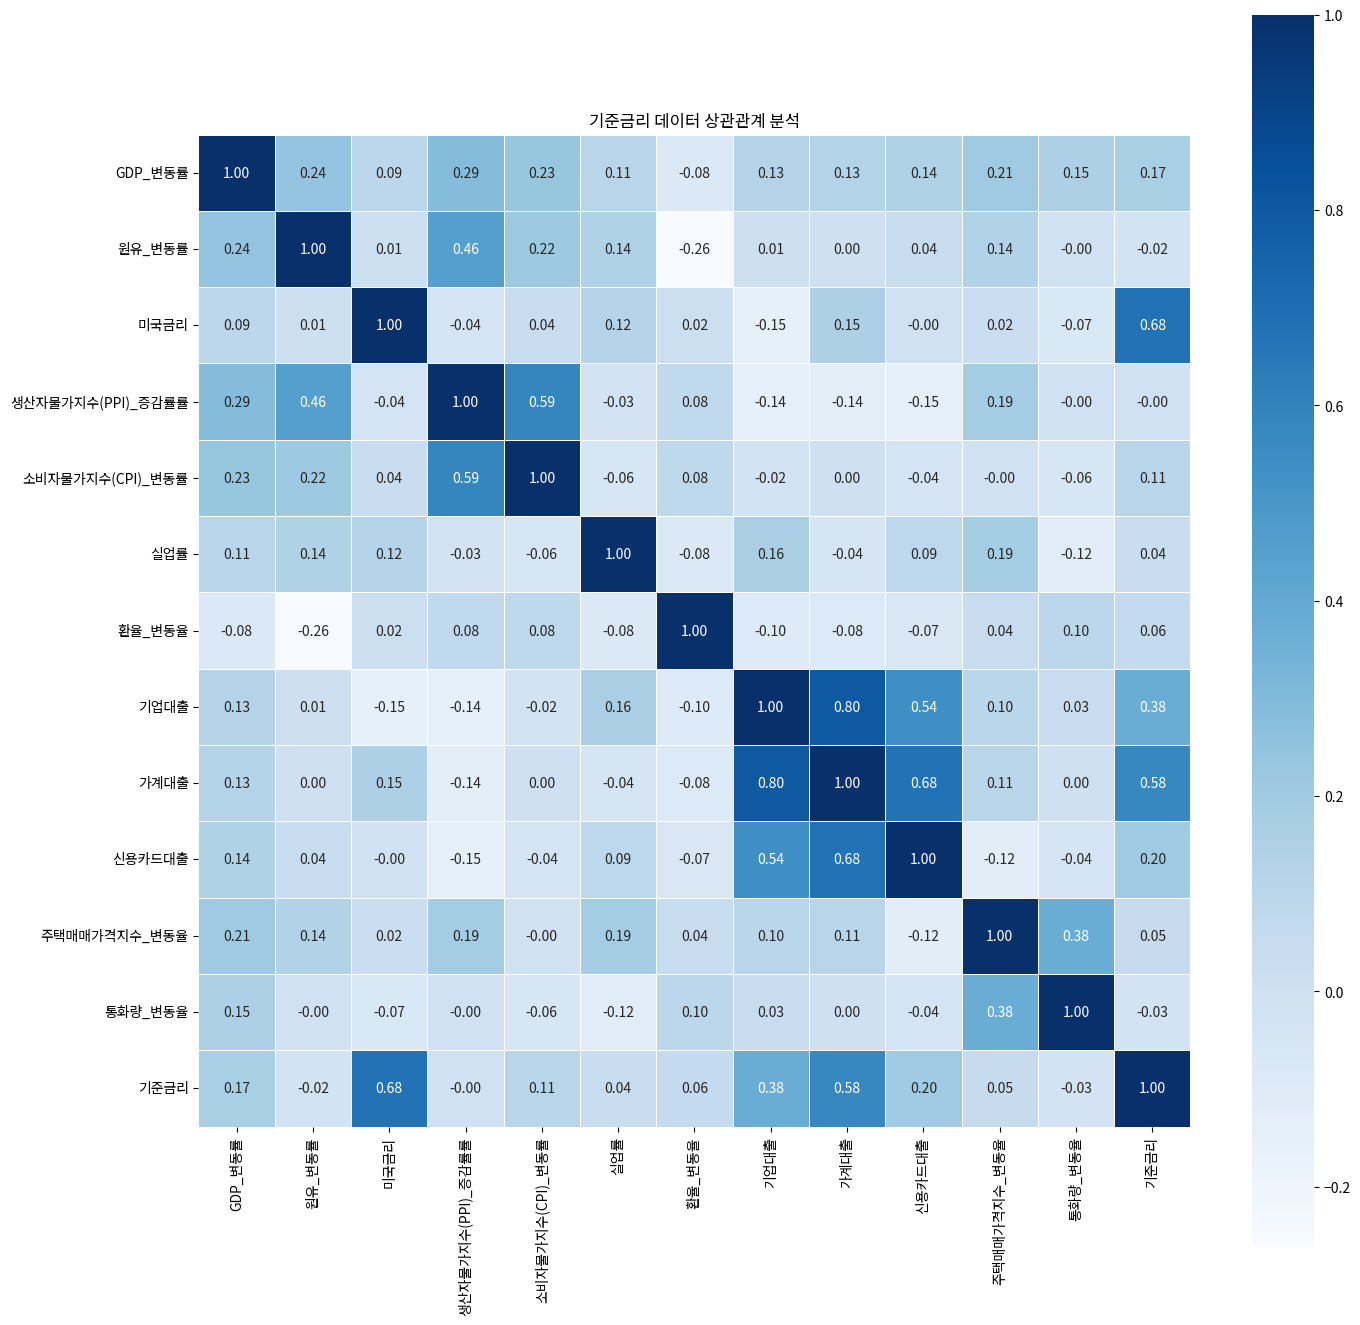

기준금리                 1.000000
미국금리                 0.678668
가계대출                 0.577439
기업대출                 0.375249
신용카드대출               0.198179
GDP_변동률              0.171384
소비자물가지수(CPI)_변동률     0.111272
환율_변동율               0.060792
주택매매가격지수_변동율         0.051839
실업률                  0.035856
통화량_변동율              0.027076
원유_변동률               0.023484
생산자물가지수(PPI)_증감률률    0.003359
Name: 기준금리, dtype: float64


In [25]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df_corr = df_org.corr()
df_corr['기준금리']

plt.figure(figsize=(16, 16))
sns.heatmap(
    df_org.corr(),
    annot=True,  # 상관계수를 셀에 표시
    fmt=".2f",  # 소수점 2자리까지 표시
    cmap="Blues",  # 색상 팔레트
    cbar=True,  # 컬러바 표시
    square=True,  # 셀을 정사각형으로 표시
    linewidths=0.5,  # 셀 간 경계선 두께
)
plt.title("기준금리 데이터 상관관계 분석")
plt.show()

df_corr = df_org.corr()
df_corr['기준금리']
print(df_corr['기준금리'].abs().sort_values(ascending=False))

- 2003 년부터의 상관계수

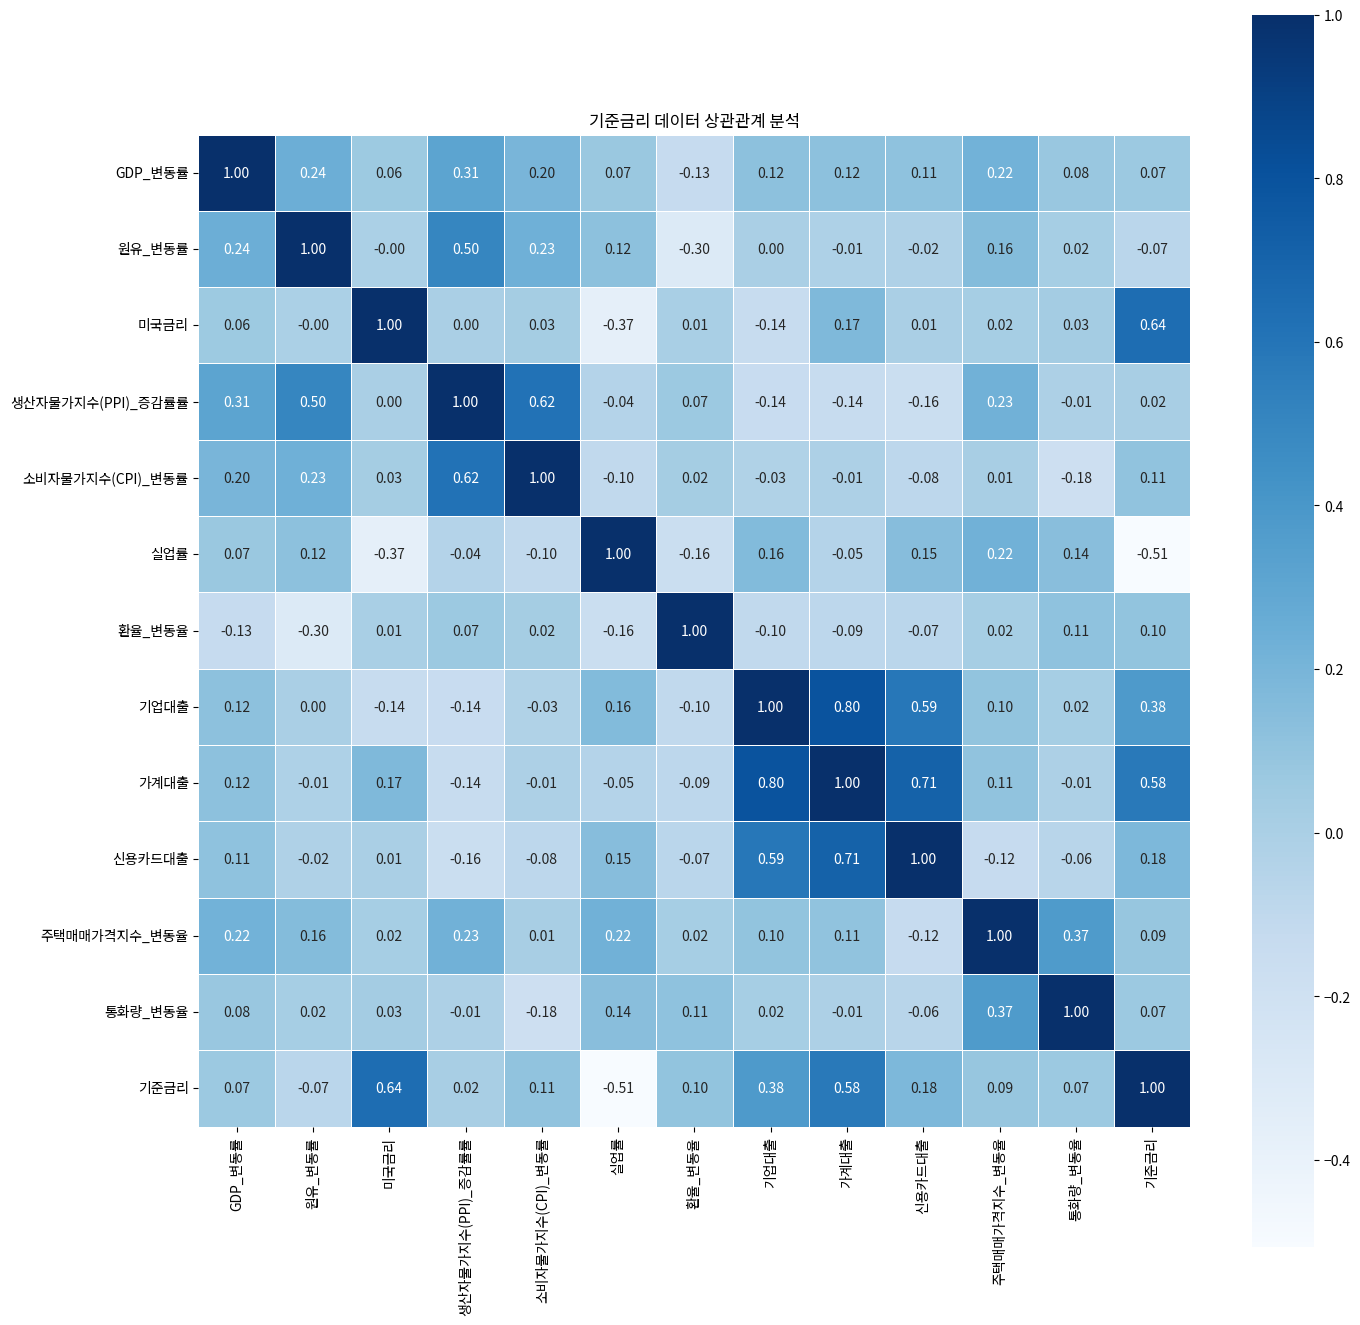

기준금리                 1.000000
미국금리                 0.642279
가계대출                 0.578744
실업률                  0.505902
기업대출                 0.377026
신용카드대출               0.178419
소비자물가지수(CPI)_변동률     0.108107
환율_변동율               0.100640
주택매매가격지수_변동율         0.086811
원유_변동률               0.071139
통화량_변동율              0.067837
GDP_변동률              0.067385
생산자물가지수(PPI)_증감률률    0.016085
Name: 기준금리, dtype: float64


In [26]:
#2003 년부터의 상관계수
c = df_org.columns
df_not_nan = df_org.dropna(how='any')
plt.figure(figsize=(16, 16))
sns.heatmap(
    df_not_nan.corr(),
    annot=True,  # 상관계수를 셀에 표시
    fmt=".2f",  # 소수점 2자리까지 표시
    cmap="Blues",  # 색상 팔레트
    cbar=True,  # 컬러바 표시
    square=True,  # 셀을 정사각형으로 표시
    linewidths=0.5,  # 셀 간 경계선 두께
)
plt.title("기준금리 데이터 상관관계 분석")
plt.show()


df_corr = df_not_nan.corr()
df_corr['기준금리']
print(df_corr['기준금리'].abs().sort_values(ascending=False))

- 2003~2009 년부터의 상관계수

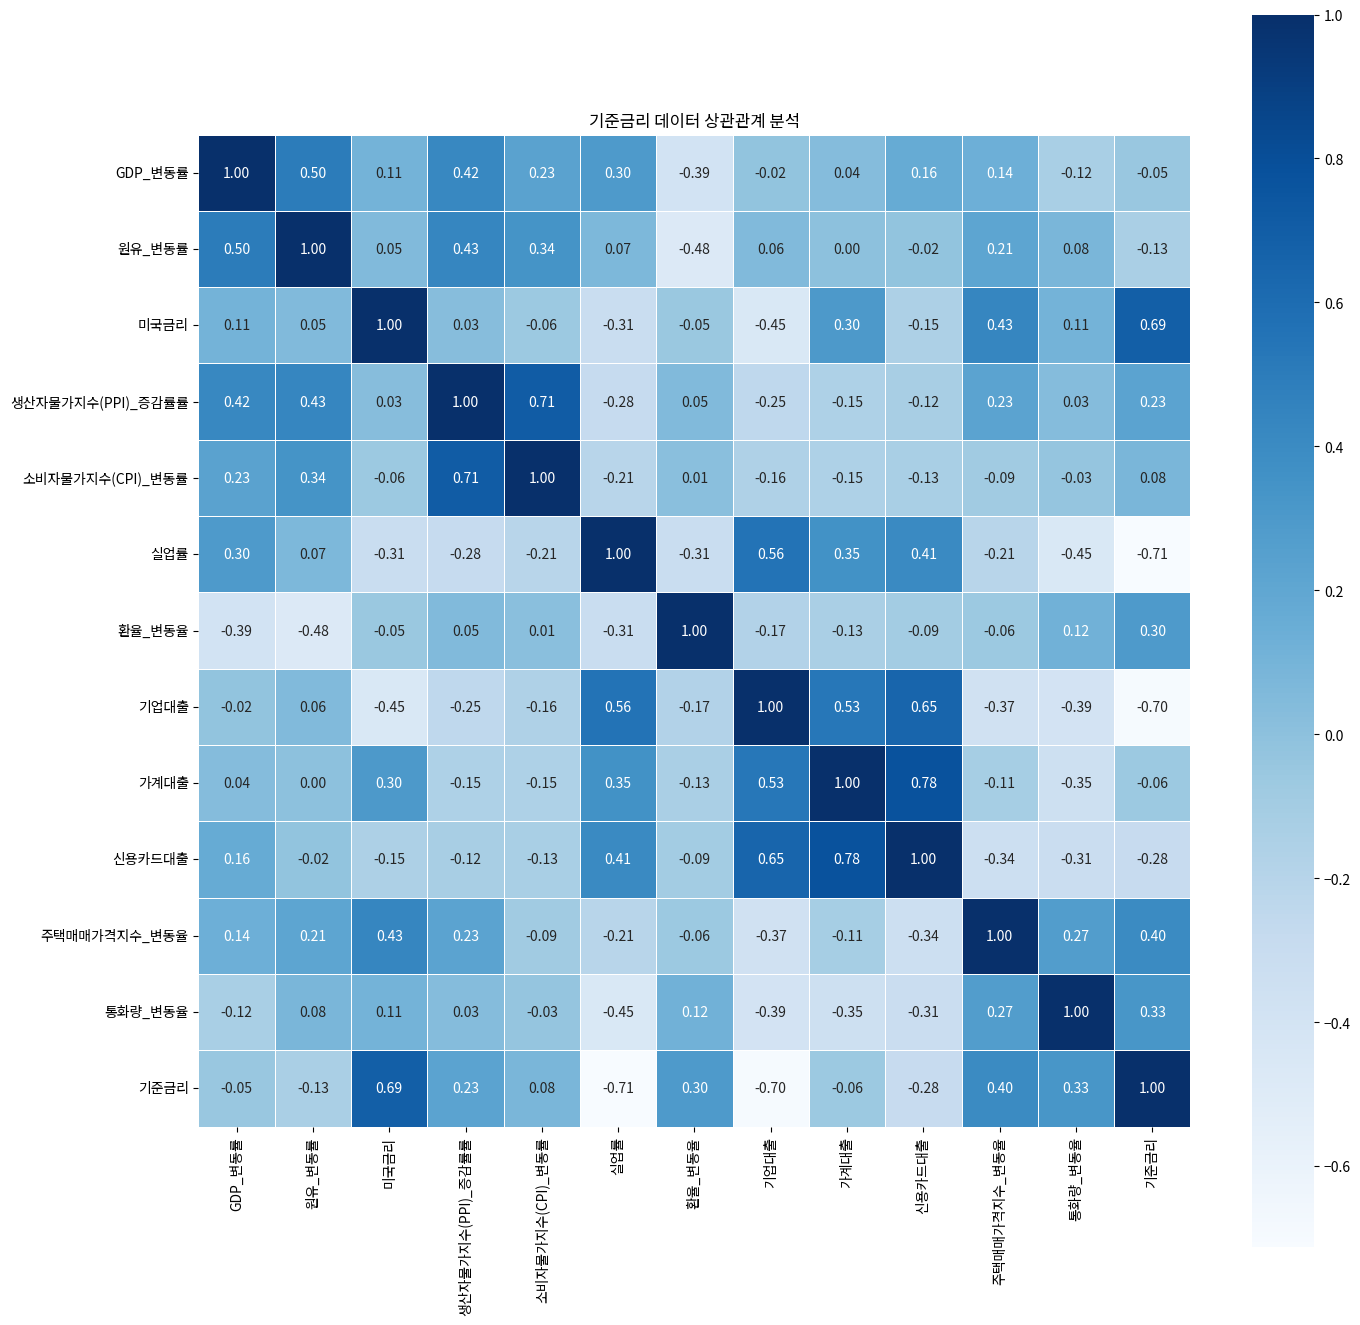

기준금리                 1.000000
실업률                  0.711938
기업대출                 0.695229
미국금리                 0.687059
주택매매가격지수_변동율         0.398537
통화량_변동율              0.328443
환율_변동율               0.297805
신용카드대출               0.284370
생산자물가지수(PPI)_증감률률    0.230680
원유_변동률               0.132014
소비자물가지수(CPI)_변동률     0.078605
가계대출                 0.062509
GDP_변동률              0.049268
Name: 기준금리, dtype: float64


In [27]:
#2003~2009 년부터의 상관계수
c = df_org.columns
df_not_nan = df_org.dropna(how='any')
df = df_not_nan.loc[:'2010/01']
plt.figure(figsize=(16, 16))
sns.heatmap(
    df.corr(),
    annot=True,  # 상관계수를 셀에 표시
    fmt=".2f",  # 소수점 2자리까지 표시
    cmap="Blues",  # 색상 팔레트
    cbar=True,  # 컬러바 표시
    square=True,  # 셀을 정사각형으로 표시
    linewidths=0.5,  # 셀 간 경계선 두께
)
plt.title("기준금리 데이터 상관관계 분석")
plt.show()

df = df.corr()
df['기준금리']
print(df['기준금리'].abs().sort_values(ascending=False))

- 2010~2019 년부터의 상관계수

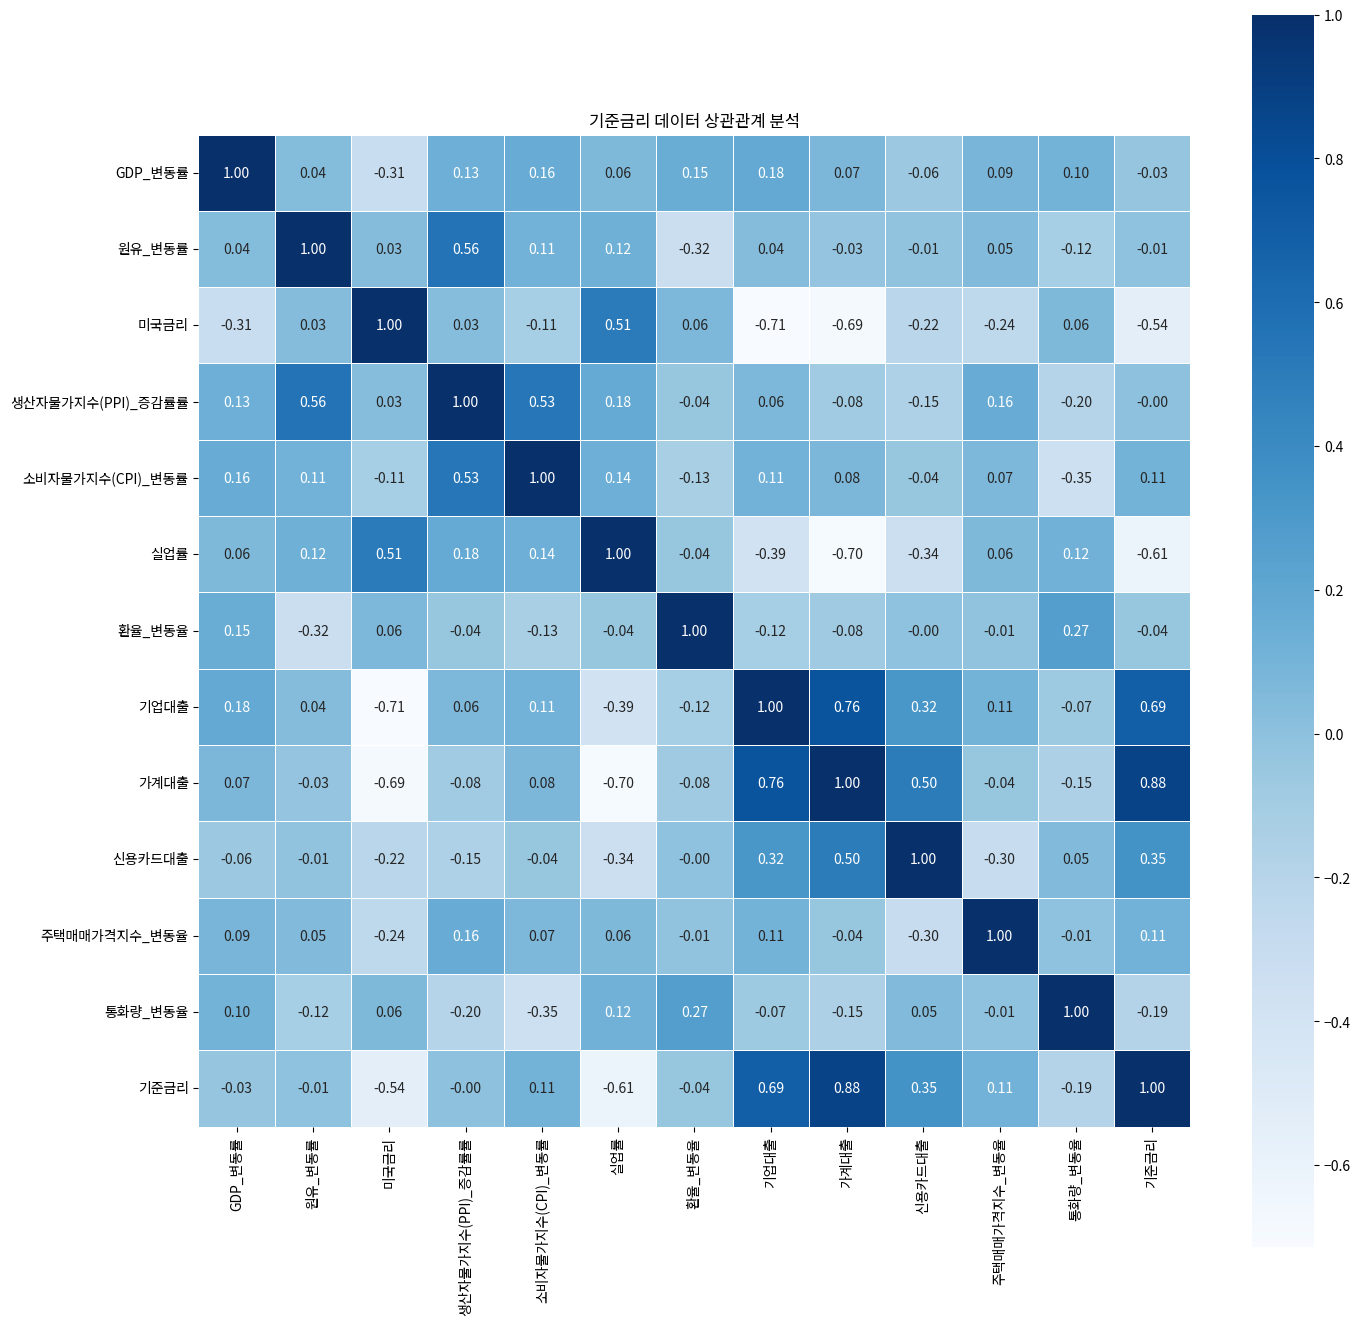

기준금리                 1.000000
가계대출                 0.879012
기업대출                 0.686004
실업률                  0.609328
미국금리                 0.539477
신용카드대출               0.347193
통화량_변동율              0.186298
주택매매가격지수_변동율         0.110417
소비자물가지수(CPI)_변동률     0.109181
환율_변동율               0.038887
GDP_변동률              0.033183
원유_변동률               0.010548
생산자물가지수(PPI)_증감률률    0.002507
Name: 기준금리, dtype: float64


In [28]:
#2010~2019 년부터의 상관계수
c = df_org.columns
df_not_nan = df_org.dropna(how='any')
df = df_not_nan.loc['2010/01':'2020/01']
plt.figure(figsize=(16, 16))
sns.heatmap(
    df.corr(),
    annot=True,  # 상관계수를 셀에 표시
    fmt=".2f",  # 소수점 2자리까지 표시
    cmap="Blues",  # 색상 팔레트
    cbar=True,  # 컬러바 표시
    square=True,  # 셀을 정사각형으로 표시
    linewidths=0.5,  # 셀 간 경계선 두께
)
plt.title("기준금리 데이터 상관관계 분석")
plt.show()

df = df.corr()
df['기준금리']
print(df['기준금리'].abs().sort_values(ascending=False))

- 지난 10년간의 상관계수

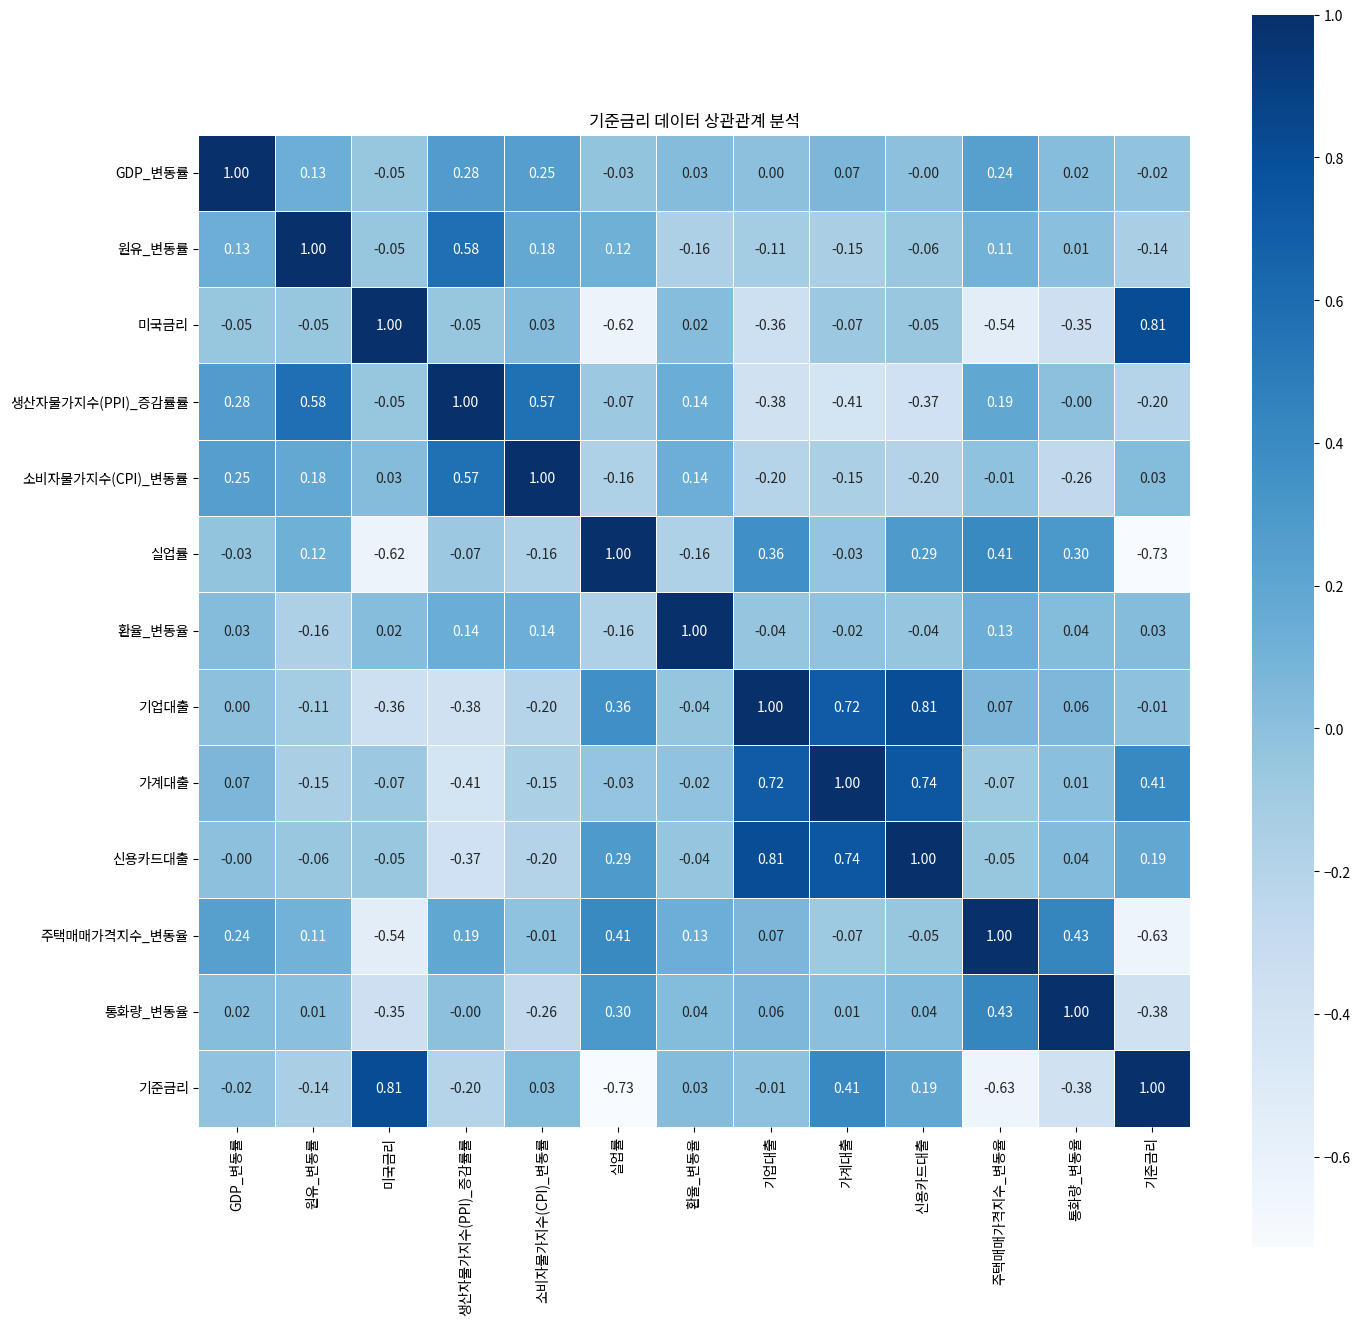

기준금리                 1.000000
미국금리                 0.814535
실업률                  0.725722
주택매매가격지수_변동율         0.633357
가계대출                 0.414147
통화량_변동율              0.380685
생산자물가지수(PPI)_증감률률    0.204405
신용카드대출               0.190061
원유_변동률               0.142641
소비자물가지수(CPI)_변동률     0.029284
환율_변동율               0.028617
GDP_변동률              0.023050
기업대출                 0.006129
Name: 기준금리, dtype: float64


In [29]:
#지난 10년간의 상관계수
c = df_org.columns
df_not_nan = df_org.dropna(how='any')
df = df_not_nan.loc['2014/01':]
plt.figure(figsize=(16, 16))
sns.heatmap(
    df.corr(),
    annot=True,  # 상관계수를 셀에 표시
    fmt=".2f",  # 소수점 2자리까지 표시
    cmap="Blues",  # 색상 팔레트
    cbar=True,  # 컬러바 표시
    square=True,  # 셀을 정사각형으로 표시
    linewidths=0.5,  # 셀 간 경계선 두께
)
plt.title("기준금리 데이터 상관관계 분석")
plt.show()

df = df.corr()
df['기준금리']
print(df['기준금리'].abs().sort_values(ascending=False))

- 지난 5년간의 상관계수

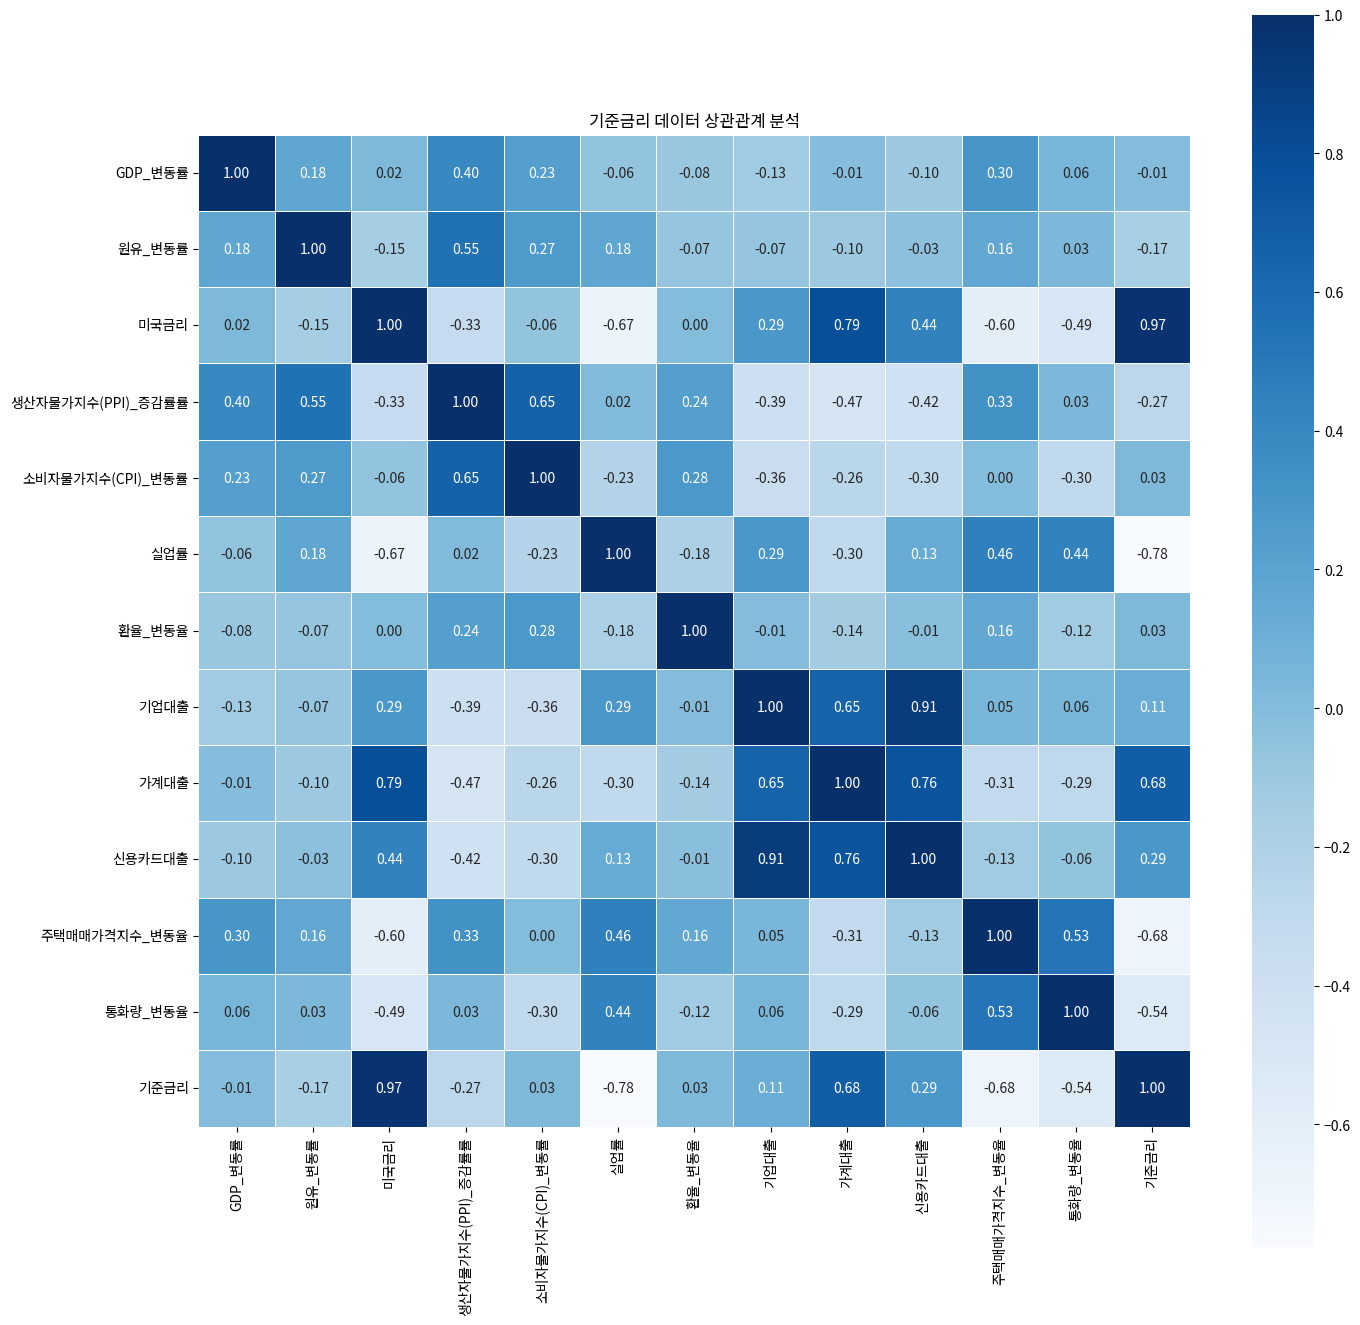

기준금리                 1.000000
미국금리                 0.973021
실업률                  0.776184
가계대출                 0.682825
주택매매가격지수_변동율         0.682181
통화량_변동율              0.536748
신용카드대출               0.291850
생산자물가지수(PPI)_증감률률    0.274795
원유_변동률               0.168766
기업대출                 0.113665
환율_변동율               0.027585
소비자물가지수(CPI)_변동률     0.025463
GDP_변동률              0.005507
Name: 기준금리, dtype: float64


In [30]:
#지난 5년간의 상관계수
c = df_org.columns
df_not_nan = df_org.dropna(how='any')
df = df_not_nan.loc['2019/01':]
plt.figure(figsize=(16, 16))
sns.heatmap(
    df.corr(),
    annot=True,  # 상관계수를 셀에 표시
    fmt=".2f",  # 소수점 2자리까지 표시
    cmap="Blues",  # 색상 팔레트
    cbar=True,  # 컬러바 표시
    square=True,  # 셀을 정사각형으로 표시
    linewidths=0.5,  # 셀 간 경계선 두께
)
plt.title("기준금리 데이터 상관관계 분석")
plt.show()

df = df.corr()
df['기준금리']
print(df['기준금리'].abs().sort_values(ascending=False))

- 상관관계가 0.5 이상인 지수들의 그래프

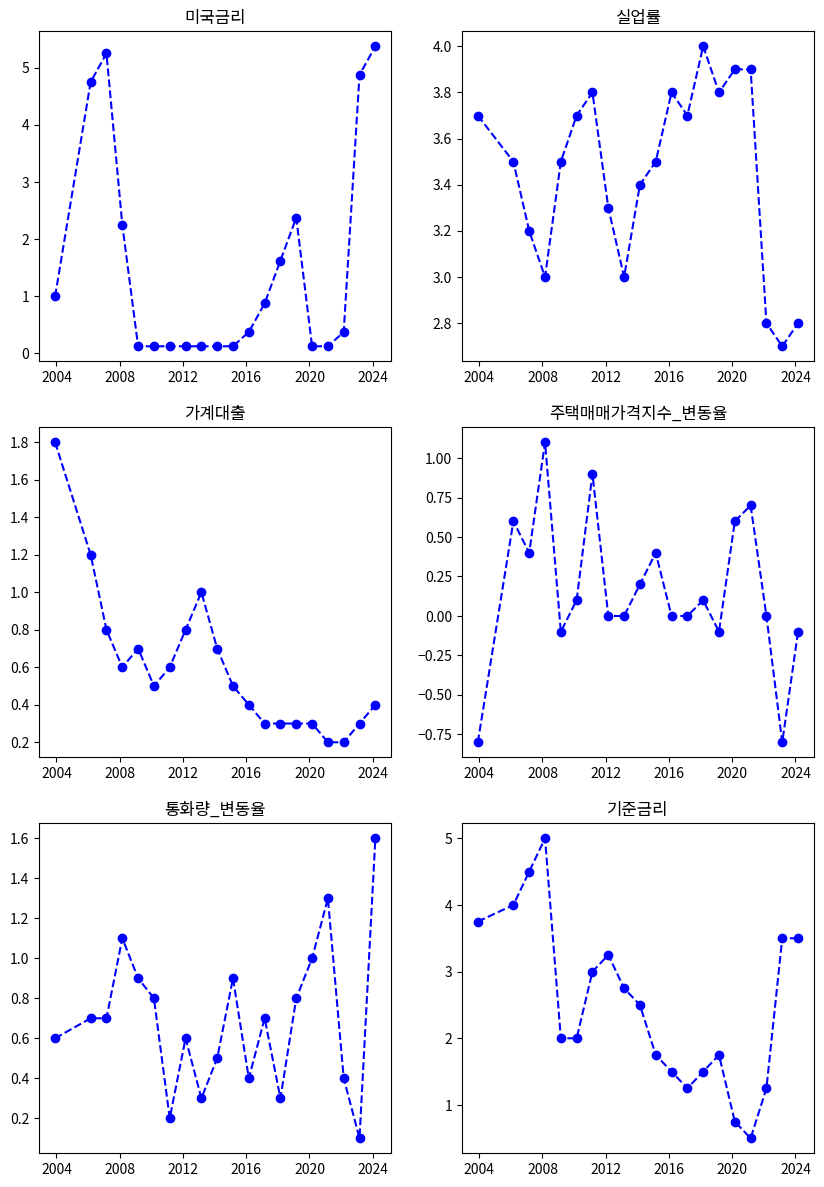

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt

c = df_org.columns
df_sampled = df_org.dropna(how='any')
df_sampled = df_sampled[[c[2],c[5],c[8], c[10], c[11],c[-1]]]

df_sampled = df_sampled.iloc[::12]

plt.figure(figsize=(10,30))
for i in range(0, len(df_sampled.columns)):
    plt.subplot(6,2,i+1)
    plt.title(df_sampled.columns[i])
    plt.plot(df_sampled.index, df_sampled[df_sampled.columns[i]], color='b', marker='o', linestyle='--', label=df_sampled.columns[i])

## 3. 결론
- 2003 년부터의 상관계수
    1. 미국금리                 0.642279
    2. 가계대출                 0.578744
    3. 실업률                  0.505902
- 2003~2009 년부터의 상관계수
    1. 실업률                  0.711938
    2. 기업대출                 0.695229
    3. 미국금리                 0.687059
- 2010~2019 년부터의 상관계수
    1. 가계대출                 0.879012
    2. 기업대출                 0.686004
    3. 실업률                  0.609328
    4. 미국금리                 0.539477
- 지난 10년간의 상관계수
    1. 미국금리                 0.814535
    2. 실업률                  0.725722
    3. 주택매매가격지수_변동율         0.633357
- 지난 5년간의 상관계수
    1. 미국금리                 0.973021
    2. 실업률                  0.776184
    3. 가계대출                 0.682825
    4. 주택매매가격지수_변동율         0.682181
    5. 통화량_변동율              0.536748

    

#### 예측에 사용할 컬럼
기준금리                 
미국금리                 
실업률                  
가계대출                 
주택매매가격지수_변동율         
통화량_변동율
기업대출                 


In [32]:
c = df_org.columns
df = df_org.dropna(how='any')
df = df[[c[3],c[6],c[8],c[9], c[11], c[12],c[-1]]]
print(df[df.isnull().any(axis=1)])

dir_path = "../predict_csv/"
save_csv(dir_path = dir_path , file_path = "Predict.csv", df = df)

Empty DataFrame
Columns: [생산자물가지수(PPI)_증감률률, 환율_변동율, 가계대출, 신용카드대출, 통화량_변동율, 기준금리, 기준금리]
Index: []
